# 452 - Assignment 5 
Shaolong (Fred) Xue

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Before performing any dimensionality reduction, write a program to use k-means clustering on the Madelon dataset. Try the following k values: 4, 8, 16, 32, 64. 

In [18]:
madelon = pd.read_csv("madelon.csv")
madelon.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0,485,477,537,479,452,471,491,476,475,...,477,481,477,485,511,485,481,479,475,496
1,1,483,458,460,487,587,475,526,479,485,...,463,478,487,338,513,486,483,492,510,517
2,2,487,542,499,468,448,471,442,478,480,...,487,481,492,650,506,501,480,489,499,498
3,3,480,491,510,485,495,472,417,474,502,...,491,480,474,572,454,469,475,482,494,461
4,4,484,502,528,489,466,481,402,478,487,...,488,479,452,435,486,508,481,504,495,511


In [5]:
madelon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 501 entries, Unnamed: 0 to V500
dtypes: int64(501)
memory usage: 9.9 MB


In [6]:
madelon.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,1299.500000,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,750.699674,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,0.000000,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,649.750000,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,1299.500000,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,1949.250000,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,2599.000000,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


In [24]:
x = madelon.filter(regex=("^V\\d+"))
y = madelon.iloc[:, 0:1]

In [25]:
## standardize the data
scale = StandardScaler()
std_x = scale.fit_transform(x)

In [26]:
std_x = pd.DataFrame(std_x)
std_x.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.516136,-0.215974,0.713077,-0.488131,-1.183243,-1.211192,0.260055,-0.409390,-0.786691,-0.794660,...,-0.251994,0.544491,-0.390690,-0.099933,0.492812,-0.682645,0.485992,-0.305568,-0.903116,0.208779
1,0.199264,-0.842352,-1.271907,0.406575,2.081658,-0.631114,1.125953,1.746751,-0.131996,-1.342085,...,-0.923340,-0.199167,0.031642,-1.253498,0.550157,-0.656116,0.827177,0.649950,0.042229,1.018908
2,0.833009,1.926899,-0.266525,-1.718352,-1.279981,-1.211192,-0.952203,1.028037,-0.459344,-0.247236,...,0.227538,0.544491,0.242809,1.194884,0.349450,-0.258173,0.315399,0.429446,-0.254880,0.285934
3,-0.276045,0.245568,0.017044,0.182899,-0.143311,-1.066172,-1.570702,-1.846818,0.980984,-0.384092,...,0.419351,0.296605,-0.517390,0.582789,-1.141514,-1.107118,-0.537563,-0.085064,-0.389929,-1.141436
4,0.357700,0.608208,0.481066,0.630252,-0.844661,0.239003,-1.941801,1.028037,-0.001058,-1.478941,...,0.275491,0.048719,-1.446521,-0.492302,-0.223998,-0.072466,0.485992,1.531967,-0.362919,0.787442


In [94]:
# define k-values and SSE list 
k_values = [4, 8, 16, 32, 64]
SSE = []
np.random.seed(1)

In [95]:
for k in k_values:
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(std_x)
    sse = kmeans.inertia_
    SSE.append(sse)

In [96]:
# print the SSE for each k-means cluster
SSE

[1277811.7351698452,
 1268320.345314774,
 1260614.9701760658,
 1250966.9337026146,
 1232753.6014047745]

### Part 1: What preprocessing techniques did you apply, if any?

Because k-means needs to calculate the distance between cluster mean and each points in the cluster, scale matters. I standardized the data first to eliminate scaling discrepency. 

### Part 2: Describe qualitatively: how does the number of clusters affect the performance of the clustering algorithm on the dataset?

The number of clusters (k) have a direct impact on the within-cluster deviances in the algorithm. 

If k is small, the number of clusters is small, and more data points will be grouped in each cluster. Therefore, the sum of squares (deviance) will be larger. Considering an extreme case, if k = 1, all data points will be in one cluster, and deviance is the maximum deviance from the whole sample. 

This is bad because our goal is to minimize the deviance when trying to find the optimal k. 

On the flip side, if k is large, the number of clusters is large, and each cluster will have less observations in them. As a result, within-cluster deviance will generally be smaller. Considering an extreme case, if k = n, each data point is categorized as its own group. Deviance is literally zero in this case. 

This is theoritically good for performance, but inpractical due to limit in computational power and the challenge in interpretation. Sometimes, real-world cases only have a few categories. More groups is not always better. 

It's up to descriptive judgement and domain knowledge to determine the optimal k. 

### Part 3: Generate a plot of the number of clusters k (x-axis) versus the sum of squared distance (SSE) between data points and their assigned centroids (y-axis). What appears to be the optimal k from the list of values you used, and why? 

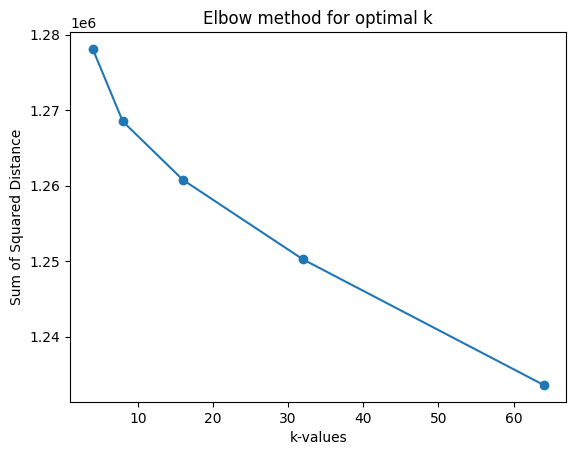

In [32]:
plt.plot(k_values, SSE, marker='o')
plt.xlabel('k-values')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow method for optimal k')
plt.show()

There is no obvious elbow point from the graph. It's hard to discern a particular k-value simply from this. And this speaks to the disadvantages of the Elbow rule. 

Given this, I would chose k=8 since going from 4 to 8 give me the biggest reducation in SSE. Further increase k does not give as significant as a reduction in SSE as shown by the slopes. 

### Part 4: For k = 8, how did you initialize the set of cluster centroids before running k-means? Rerun k-means again, this time ensuring that the centroids are all different. Does this – and if so, to what extent – affect the final clusters created?

In [87]:
# k=8, initial centroid location default (using greedy kmeans++ and 10 runs)
km = KMeans(n_clusters = 8, init = 'k-means++', n_init = 10)
km.fit(std_x)
sse1 = km.inertia_

In [88]:
# k=8, initial centroid location set randomly and do 10 runs
km = KMeans(n_clusters = 8, init = 'random', n_init = 10)
km.fit(std_x)
sse2 = km.inertia_

In [89]:
print("SSE from default location: " + str(sse1))
print("SSE from default location: " + str(sse2))
print("The difference: " + str(sse1-sse2))

SSE from default location: 1268310.8600189234
SSE from default location: 1268260.2124278015
The difference: 50.64759112196043


In the initial k-means clustering, the centroids location was initialized with the default greedy algorithum kmeans++, which select initial centroids that are well-spaced out in order to speed up finding the optimal centroids.

In the rerun, the centroids location was initialized randomly. And the resulting difference in SSE isn't significant at all. 

### Part 5: More generally for any dataset, what evaluation metrics can be used to assess the quality of the clusters produced?

Besides using deviance (SSE) and the Elbow Rule to evaluate the clusters performance, we could use information criteria such as AICc or BIC. But we need to be aware that the quality of IC evaluation is lower when applied here than in regression analysis. 

Alternatively, we can also use CV or CV lasso to evaluate the performance of the clusters produced. They may require more effort to run, but the assessment is generally more robust. 

## Question 2: The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. 

### Part 1: Fit the standardized data with PCA. Then, create a cumulative variance plot – showing the number of components included (x-axis) versus the amount of variance captured (y-axis). Generally, we want to retain at least 75% of the variance. How many components would you decide to keep?

In [120]:
pca = PCA(n_components = None)
pca.fit(std_x)

PCA()

In [121]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

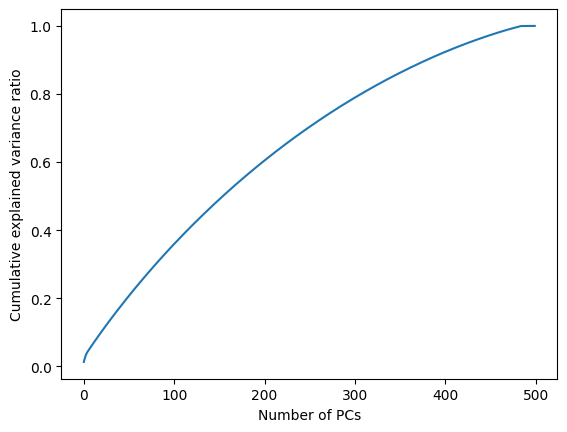

In [122]:
plt.plot(cumulative_variance)
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative explained variance ratio')
plt.show()

From the plot, we would need roughly 250 principle components to capture 75% of the variance in the data. That's quite a lot of PCs!

### Part 2: Perform PCA with your selected principal components.
#### 2.1: Plot the transformed data on a graph with the first two principal components as the axes i.e. x = PC 1, y = PC 2.

In [124]:
pc1pc2 = pca.transform(std_x)[:, :2]

In [125]:
pd.DataFrame(pc1pc2)

,0,1
0,-4.962295,-0.581909
1,-0.460950,2.866514
2,1.127654,-2.238192
3,2.892800,-1.863366
4,-0.667318,1.914901
...,...,...
2595,1.648383,0.266456
2596,-1.075983,-1.358455
2597,2.740093,1.759889
2598,1.319530,-2.664486


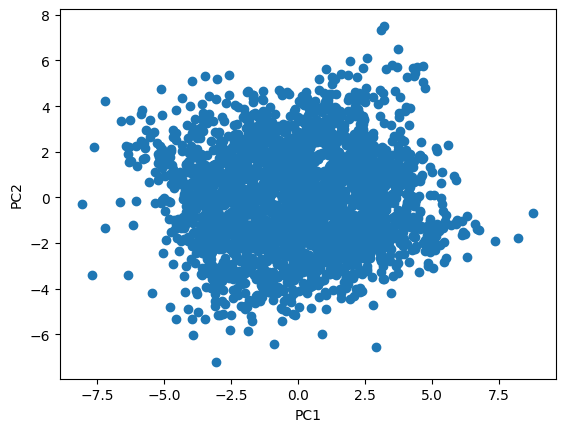

In [126]:
plt.scatter(pc1pc2[:, 0], pc1pc2[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#### 2.2: Plot the original data on a graph with the two original variables that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

In [78]:
# find the two original variables that maximize |loading PC1| + |loading PC2|
loadings = pca.components_[:2, :]
abs_loadings = np.abs(loadings)
sum_abs_loadings = np.sum(abs_loadings, axis=0)
top_vars = np.argsort(sum_abs_loadings)[::-1][:2]
x1, x2 = top_vars

In [79]:
print("The first original variable is: V" + str(x1))
print("The second original variable is: V" + str(x2))

The first original variable is: V338
The second original variable is: V281


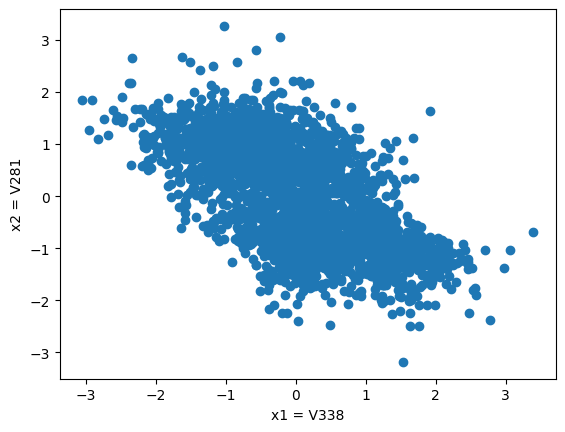

In [81]:
# plot the two original variables
plt.scatter(std_x.iloc[:, x1], std_x.iloc[:, x2])
plt.xlabel("x1 = V" + str(x1))
plt.ylabel("x2 = V" + str(x2))
plt.show()

### Part 3: Examine the scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all data points that you created in the previous part. Qualitatively, can you identify visible clusters? Why or why not might this be the case with this particular dataset?

From the scatter plot, I couldn't identify visible clusters. This is probably because the dataset is inherently non-clustered. Or, the clusters are still not easily separable even in reduced dimensional space. 

Another case, it's possible that PCA is not the best technique to apply here. PCA is a linear technique, but as we know, the dataset "madelon" is highly non-linear. 

## Question 3: Now, we will run k-means clustering on the transformed data from the previous problem.

### Part 1: Why is it a good idea to do this, especially for high-dimensional datasets? Name a number of reasons.

Dimensionality reduction is the number one reason for me. High-dimensional datasets are tricky to visualize and analyze. Transforming the dataset through PCA simplies the data and make it easier to deal with, while maintain enough variance from the raw data. 

PCA can also improve the quality of clustering by identifying dimensions that capture the most variance in the data. I didn't identify any visble cluters previously, so I'm curious to see the outcome of a PCA transformed plot. 

PCA can also reduce meaningless noise in the data. High-dimensional datasets can be full of random noise, which is part of the reason why it's difficult to work with. They cover up the true patterns in the data. Eliminating meaningless dimensions serves us well in this sense. 

### Part 2: Use the same k values again (4, 8, 16, 32, 64) to again generate an elbow plot.

In [103]:
pca_SSE = []

In [104]:
for k in k_values:
    kmeans = KMeans(n_clusters = k, init = 'random', n_init = 10)
    kmeans.fit(pc1pc2)
    sse = kmeans.inertia_
    pca_SSE.append(sse)

In [105]:
pca_SSE

[9421.581722648865,
 4969.940320699165,
 2567.8306748712525,
 1359.0651308852894,
 683.0744937763432]

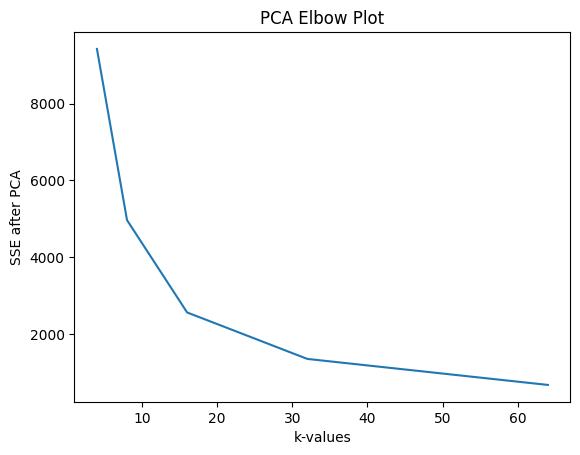

In [107]:
plt.plot(k_values, pca_SSE)
plt.xlabel('k-values')
plt.ylabel('SSE after PCA')
plt.title('PCA Elbow Plot')
plt.show()

#### 2.1: What is the optimal k? Is it different from the one you found in (1)?

From this new elbow plot, I would choose k = 16 because it has a clear kink. The slope of the plot drastically reduces after k=16, which means there's not much more marginal variance being captured. This is different from my previous call of k=8, thanks to the help of PCA. 

#### 2.2: Compare the SSE values plotted in this exercise to the previous plot you generated in (1c) before performing PCA.

In [110]:
print("SSE before PCA: ")
print("---")
print(pd.DataFrame(SSE))

SSE before PCA: 
---
              0
0  1.277812e+06
1  1.268320e+06
2  1.260615e+06
3  1.250967e+06
4  1.232754e+06


In [111]:
print("SSE after PCA: ")
print("---")
print(pd.DataFrame(pca_SSE))

SSE after PCA: 
---
             0
0  9421.581723
1  4969.940321
2  2567.830675
3  1359.065131
4   683.074494


PCA has helped reduced SSE within our clusters!

### Part 3: Again, create a scatter plot of PC 1 (x-axis) versus PC 2 (y-axis) for all of the transformed data points. Label the cluster centers and color-code by cluster assignment for the first 5 iterations of k = 32. Can you see the algorithm begin to converge to optimal assignments?

In [128]:
# run k-means clustering on first two PCs (k =32)
kmeans = KMeans(n_clusters = 32, init = 'random', n_init = 10)
kmeans.fit(pc1pc2)
centers = kmeans.cluster_centers_

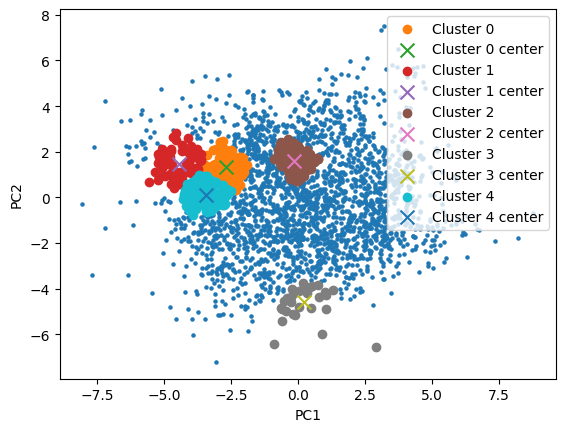

In [137]:
# plot PC1 vs PC2
plt.scatter(pc1pc2[:, 0], pc1pc2[:, 1], s = 5)
for i in range(5):
    # cluster membership for each point
    labels = kmeans.labels_
    # create scatter plot for each cluster
    plt.scatter(pc1pc2[labels==i, 0], pc1pc2[labels==i, 1], label = f"Cluster {i}")
    # plot the center of each cluster
    plt.scatter(centers[i, 0], centers[i, 1], s = 100, marker = "x", label = f"Cluster {i} center")
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

From the new PC1 vs PC2 plot, it's visble that the k-means algorithm is converging to optimal cluster assignments. 